Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed_2019.pkl")

In [4]:
data.reset_index(drop=True, inplace=True)

In [5]:
data.head()

,Would_live_in_another_neighborhood,District,Woman,Car,Support_with_housework,Owner,House_size,No_of_people_in_the_house,Family_type,Financial_situation,...,CIRCULATION AND TRAFFIC,BUS,CITIZEN SECURITY IN THE CITY AS A WHOLE,CITY MANAGEMENT,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,0.0,SANTS - MONTJUÏC,0,1,0.0,1.0,51-100 M2,TWO,COUPLE WITH NO CHILDREN,GOOD,...,GOOD,GOOD,"NEITHER BAD, NOR GOOD",GOOD,0,0,0,0,0,0
1,0.0,SANTS - MONTJUÏC,1,0,0.0,1.0,51-100 M2,ONE,SINGLE,BAD,...,"NEITHER BAD, NOR GOOD",GOOD,GOOD,"NEITHER BAD, NOR GOOD",1,0,0,0,0,0
2,0.0,SANTS - MONTJUÏC,1,0,1.0,0.0,51-100 M2,ONE,SINGLE,GOOD,...,"NEITHER BAD, NOR GOOD",GOOD,"NEITHER BAD, NOR GOOD","NEITHER BAD, NOR GOOD",0,0,0,1,0,0
3,1.0,SANTS - MONTJUÏC,0,0,0.0,1.0,< 50 M2,TWO,COUPLE WITH NO CHILDREN,BAD,...,"NEITHER BAD, NOR GOOD",GOOD,"NEITHER BAD, NOR GOOD","NEITHER BAD, NOR GOOD",0,0,1,0,0,0
4,0.0,SANTS - MONTJUÏC,1,0,1.0,1.0,51-100 M2,TWO,SINGLE-PARENT WITH CHILDREN,GOOD,...,"NEITHER BAD, NOR GOOD","NEITHER BAD, NOR GOOD",GOOD,GOOD,0,1,0,0,0,0


In [6]:
data.shape

(1169, 48)

In [7]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'House_size',
 'No_of_people_in_the_house',
 'Family_type',
 'Financial_situation',
 'Disability',
 'Living_with_disabled_person',
 'Time_living_in_BCN',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'Residential_satisfaction',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION AND TRAFFIC',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITY MANAGEMENT',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfactio

In [8]:
data.groupby(['Residential_satisfaction']).size()

Residential_satisfaction
0     149
1    1020
dtype: int64

In [9]:
x_var = ['District',
 'Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'House_size',
 'No_of_people_in_the_house',
 'Family_type',
 'Financial_situation',
 'Disability',
 'Living_with_disabled_person',
 'Time_living_in_BCN',
 'BCN_evolution',
 'BCN_future',
 'BCN_transport',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION AND TRAFFIC',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITY MANAGEMENT']

In [10]:
y = data['Residential_satisfaction']

In [11]:
x = pd.get_dummies(data[x_var])

In [12]:
x.columns.tolist()

['Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'Disability',
 'Living_with_disabled_person',
 'District_CIUTAT VELLA',
 'District_EIXAMPLE',
 'District_GRÀCIA',
 'District_HORTA - GUINARDÓ',
 'District_LES CORTS',
 'District_NOU BARRIS',
 'District_SANT ANDREU',
 'District_SANT MARTÍ',
 'District_SANTS - MONTJUÏC',
 'District_SARRIÀ - SANT GERVASI',
 'House_size_101-150 M2',
 'House_size_51-100 M2',
 'House_size_< 50 M2',
 'House_size_> 150 M2',
 "House_size_I DON'T KNOW",
 'No_of_people_in_the_house_ONE',
 'No_of_people_in_the_house_THREE OR MORE',
 'No_of_people_in_the_house_TWO',
 'Family_type_COUPLE WITH CHILDREN',
 'Family_type_COUPLE WITH NO CHILDREN',
 'Family_type_OTHER',
 'Family_type_SINGLE',
 'Family_type_SINGLE-PARENT WITH CHILDREN',
 'Financial_situation_BAD',
 'Financial_situation_GOOD',
 'Time_living_in_BCN_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD',
 'Time_living_in_BCN_LESS THAN 10 YEARS',
 'Time_living_in_BCN_MORE THAN 10 YEARS',
 'BCN_evolution_IT HAS IMPROVED

In [13]:
for i in ['District_EIXAMPLE',
 'House_size_< 50 M2',
 'No_of_people_in_the_house_ONE',
 'Family_type_OTHER',
 'Financial_situation_BAD',
 'Time_living_in_BCN_LESS THAN 10 YEARS',
 'BCN_evolution_IT HAS WORSENED',
 'BCN_future_IT WILL WORSEN',
 'BCN_transport_BAD',
 'GARBAGE COLLECTION_BAD',
 'STREETS CLEANING_BAD',
 'NOISE_BAD',
 'GREEN AREAS_BAD',
 'PUBLIC LIGHTING_BAD',
 'ASPHALT AND STREET CONSERVATION_BAD',
 'CIRCULATION AND TRAFFIC_BAD',
 'BUS_BAD',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE_BAD',
 'CITY MANAGEMENT_BAD']:
    del x[i]

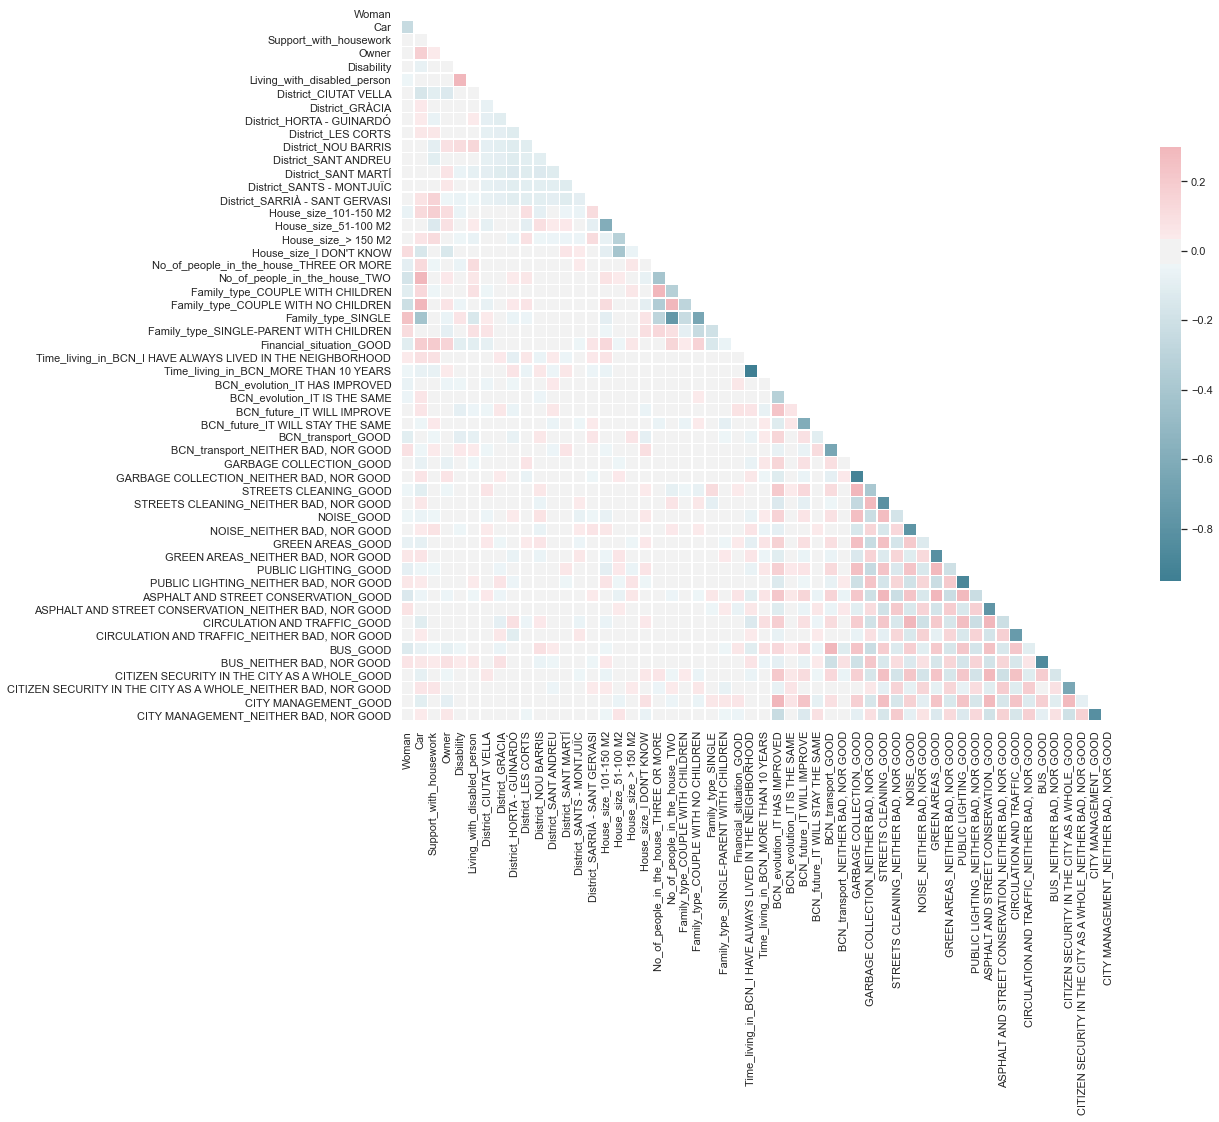

In [14]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = x.corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, #annot = corr.round(2), 
            linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
x = sm.add_constant(x)

In [16]:
def odds_ratios(results):
    return np.exp(results.params)

def classification_table(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Residential_satisfaction': 'y', 0: 'y_predict'}, inplace=True)
    return pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])

def plot_roc_auc(results):
    y_predict = results.predict(x)
    roc_auc = roc_auc_score(y, y_predict)
    fpr, tpr, thresholds = roc_curve(y, y_predict)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# https://github.com/statsmodels/statsmodels/issues/5861
def pseudo_r2(results):
    return print("Pseudo R2:", (1 - results.llf / results.llnull))

def adj_count_r2(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Residential_satisfaction': 'y', 0: 'y_predict'}, inplace=True)
    df = pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])
    return print("Adj Count R2:", round((df[0][0] + df[1][1] - (df[1][1]+df[0][1]))/(df[1][0]+df[0][0]),3))

# Logit

In [17]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1115
Model Family:                      Binomial   Df Model:                           53
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -361.28
Date:                      Thu, 13 May 2021   Deviance:                       722.56
Time:                              20:56:12   Pearson chi2:                 1.17e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                             0.1522      0.876      0.174      0.862      -1.564       1.869
Woman                                                             0.4339      0.218      1.987      0.047       0.006       0.862
Car                                                              -0.3276      0.242     -1.351      0.177      -0.803       0.148
Support_with_housework                                            0.0625      0.233      0.268      0.788      -0.394       0.519
Owner                                                             0.4222      0.272      1.554      0.120      -0.110       0.955
Disability                                                       -0.0911      0.358     -0.255      0.799      -0.792       0.610
Living_with_disabled_person                                      -0.1002      0.299     -0.335      0.738      -0.686       0.486
District_CIUTAT VELLA                                            -1.2383      0.456     -2.714      0.007      -2.133      -0.344
District_GRÀCIA                                                  -0.7846      0.413     -1.899      0.058      -1.595       0.025
District_HORTA - GUINARDÓ                                        -0.1544      0.408     -0.378      0.705      -0.954       0.646
District_LES CORTS                                               -0.3256      0.445     -0.732      0.464      -1.197       0.546
District_NOU BARRIS                                              -0.5115      0.422     -1.212      0.225      -1.338       0.315
District_SANT ANDREU                                             -0.2288      0.449     -0.510      0.610      -1.109       0.651
District_SANT MARTÍ                                              -0.1730      0.411     -0.421      0.674      -0.978       0.632
District_SANTS - MONTJUÏC                                        -0.6773      0.412     -1.644      0.100      -1.485       0.130
District_SARRIÀ - SANT GERVASI                                   -0.1653      0.460     -0.359      0.719      -1.067       0.736
House_size_101-150 M2                                            -0.5784      0.577     -1.002      0.316      -1.710       0.553
House_size_51-100 M2                                             -0.5098      0.504     -1.012      0.311      -1.497       0.477
House_size_> 150 M2                                              -0.8303      0.707     -1.174      0.240      -2.216       0.555
House_size_I DON'T KNOW                                          -0.3377      0.653     -0.517      0.605      -1.618       0.942
No_of_people_in_the_house_T

In [18]:
glm_logit_results.aic

830.5634657247423

In [19]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7153.6894513166135

In [20]:
pseudo_r2(glm_logit_results)

Pseudo R2: 0.18996338033263538


In [21]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0,28,121
1,10,1010


In [22]:
adj_count_r2(glm_logit_results)

Adj Count R2: 0.121


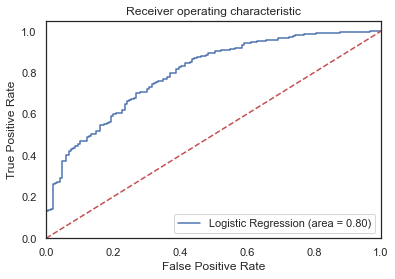

In [23]:
plot_roc_auc(glm_logit_results)

In [24]:
glm_logit_results.pvalues.sort_values(ascending=False)

BUS_GOOD                                                         0.957704
NOISE_GOOD                                                       0.924618
Family_type_SINGLE-PARENT WITH CHILDREN                          0.915138
GREEN AREAS_GOOD                                                 0.900030
Financial_situation_GOOD                                         0.893692
PUBLIC LIGHTING_GOOD                                             0.890583
const                                                            0.862050
CIRCULATION AND TRAFFIC_NEITHER BAD, NOR GOOD                    0.823398
BCN_transport_GOOD                                               0.808740
Disability                                                       0.798947
Support_with_housework                                           0.788426
Family_type_COUPLE WITH NO CHILDREN                              0.783108
BUS_NEITHER BAD, NOR GOOD                                        0.782770
Time_living_in_BCN_I HAVE ALWAYS LIVED

In [25]:
for i in ["BUS_GOOD", "BUS_NEITHER BAD, NOR GOOD",
          "Family_type_SINGLE-PARENT WITH CHILDREN", "Family_type_COUPLE WITH NO CHILDREN",
          "Family_type_COUPLE WITH CHILDREN", "Family_type_SINGLE",
          "NOISE_GOOD", "NOISE_NEITHER BAD, NOR GOOD",
          "Time_living_in_BCN_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD", "Time_living_in_BCN_MORE THAN 10 YEARS",
          "GREEN AREAS_GOOD", "GREEN AREAS_NEITHER BAD, NOR GOOD",
          "Financial_situation_GOOD", 'Support_with_housework', 'Disability', 'Living_with_disabled_person',
          "PUBLIC LIGHTING_GOOD", "PUBLIC LIGHTING_NEITHER BAD, NOR GOOD",
          "CIRCULATION AND TRAFFIC_NEITHER BAD, NOR GOOD", "CIRCULATION AND TRAFFIC_GOOD",
          "BCN_transport_GOOD", "BCN_transport_NEITHER BAD, NOR GOOD", 
          "No_of_people_in_the_house_TWO", "No_of_people_in_the_house_THREE OR MORE",
          "GARBAGE COLLECTION_NEITHER BAD, NOR GOOD", "GARBAGE COLLECTION_GOOD",
          "House_size_I DON'T KNOW", "House_size_101-150 M2", "House_size_51-100 M2", "House_size_> 150 M2",
            "STREETS CLEANING_NEITHER BAD, NOR GOOD", "STREETS CLEANING_GOOD"]:
    del x[i]

In [26]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1146
Model Family:                      Binomial   Df Model:                           22
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -367.87
Date:                      Thu, 13 May 2021   Deviance:                       735.75
Time:                              20:56:13   Pearson chi2:                 1.20e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -0.2806      0.453     -0.620      0.536      -1.168       0.607
Woman                                                             0.4295      0.205      2.093      0.036       0.027       0.832
Car                                                              -0.4371      0.219     -2.000      0.046      -0.865      -0.009
Owner                                                             0.3333      0.254      1.310      0.190      -0.165       0.832
District_CIUTAT VELLA                                            -1.1641      0.431     -2.701      0.007      -2.009      -0.319
District_GRÀCIA                                                  -0.8082      0.396     -2.041      0.041      -1.585      -0.032
District_HORTA - GUINARDÓ                                        -0.1804      0.386     -0.468      0.640      -0.936       0.575
District_LES CORTS                                               -0.2716      0.427     -0.637      0.524      -1.108       0.564
District_NOU BARRIS                                              -0.5571      0.395     -1.412      0.158      -1.330       0.216
District_SANT ANDREU                                             -0.2246      0.428     -0.525      0.600      -1.064       0.614
District_SANT MARTÍ                                              -0.1968      0.397     -0.496      0.620      -0.975       0.581
District_SANTS - MONTJUÏC                                        -0.6384      0.398     -1.605      0.108      -1.418       0.141
District_SARRIÀ - SANT GERVASI                                   -0.2234      0.436     -0.513      0.608      -1.077       0.630
BCN_evolution_IT HAS IMPROVED                                     0.7228      0.329      2.200      0.028       0.079       1.367
BCN_evolution_IT IS THE SAME                                      0.5395      0.279      1.933      0.053      -0.008       1.087
BCN_future_IT WILL IMPROVE                                        1.1865      0.235      5.044      0.000       0.725       1.648
BCN_future_IT WILL STAY THE SAME                                  0.5357      0.243      2.204      0.028       0.059       1.012
ASPHALT AND STREET CONSERVATION_GOOD                              0.8081      0.308      2.621      0.009       0.204       1.413
ASPHALT AND STREET CONSERVATION_NEITHER BAD, NOR GOOD             0.1830      0.258      0.709      0.478      -0.322       0.688
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD                      0.5003      0.299      1.671      0.095      -0.086       1.087
CITIZEN SECURITY IN THE CIT

In [27]:
glm_logit_results.aic

781.7483689164219

In [28]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7359.485570930568

In [29]:
glm_logit_results.pvalues.sort_values(ascending=False)

District_HORTA - GUINARDÓ                                        6.399334e-01
District_SANT MARTÍ                                              6.201356e-01
District_SARRIÀ - SANT GERVASI                                   6.079850e-01
District_SANT ANDREU                                             5.998063e-01
const                                                            5.355793e-01
District_LES CORTS                                               5.242244e-01
ASPHALT AND STREET CONSERVATION_NEITHER BAD, NOR GOOD            4.780160e-01
Owner                                                            1.901058e-01
District_NOU BARRIS                                              1.579516e-01
District_SANTS - MONTJUÏC                                        1.083980e-01
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD                     9.465772e-02
BCN_evolution_IT IS THE SAME                                     5.327053e-02
Car                                                             

In [30]:
del x['Owner']

In [31]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1147
Model Family:                      Binomial   Df Model:                           21
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -368.71
Date:                      Thu, 13 May 2021   Deviance:                       737.42
Time:                              20:56:13   Pearson chi2:                 1.21e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -0.0595      0.421     -0.142      0.887      -0.884       0.765
Woman                                                             0.4311      0.205      2.101      0.036       0.029       0.833
Car                                                              -0.3777      0.213     -1.772      0.076      -0.795       0.040
District_CIUTAT VELLA                                            -1.2070      0.428     -2.820      0.005      -2.046      -0.368
District_GRÀCIA                                                  -0.7994      0.396     -2.016      0.044      -1.576      -0.022
District_HORTA - GUINARDÓ                                        -0.1395      0.384     -0.363      0.716      -0.892       0.613
District_LES CORTS                                               -0.2628      0.426     -0.617      0.537      -1.098       0.572
District_NOU BARRIS                                              -0.4926      0.391     -1.261      0.207      -1.258       0.273
District_SANT ANDREU                                             -0.1936      0.427     -0.453      0.651      -1.031       0.644
District_SANT MARTÍ                                              -0.1450      0.395     -0.367      0.713      -0.919       0.629
District_SANTS - MONTJUÏC                                        -0.6081      0.397     -1.533      0.125      -1.386       0.169
District_SARRIÀ - SANT GERVASI                                   -0.2520      0.434     -0.580      0.562      -1.103       0.599
BCN_evolution_IT HAS IMPROVED                                     0.7058      0.327      2.155      0.031       0.064       1.348
BCN_evolution_IT IS THE SAME                                      0.5330      0.279      1.913      0.056      -0.013       1.079
BCN_future_IT WILL IMPROVE                                        1.2037      0.235      5.126      0.000       0.743       1.664
BCN_future_IT WILL STAY THE SAME                                  0.5504      0.243      2.270      0.023       0.075       1.026
ASPHALT AND STREET CONSERVATION_GOOD                              0.7952      0.308      2.585      0.010       0.192       1.398
ASPHALT AND STREET CONSERVATION_NEITHER BAD, NOR GOOD             0.1819      0.258      0.706      0.480      -0.323       0.687
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD                      0.4989      0.299      1.670      0.095      -0.087       1.084
CITIZEN SECURITY IN THE CITY AS A WHOLE_NEITHER BAD, NOR GOOD     0.7260      0.229      3.170      0.002       0.277       1.175
CITY MANAGEMENT_GOOD       

In [32]:
glm_logit_results.aic

781.4207268010628

In [33]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7364.8771170074

In [34]:
glm_logit_results.pvalues.sort_values(ascending=False)

const                                                            8.874749e-01
District_HORTA - GUINARDÓ                                        7.163636e-01
District_SANT MARTÍ                                              7.134761e-01
District_SANT ANDREU                                             6.506439e-01
District_SARRIÀ - SANT GERVASI                                   5.615926e-01
District_LES CORTS                                               5.371816e-01
ASPHALT AND STREET CONSERVATION_NEITHER BAD, NOR GOOD            4.803099e-01
District_NOU BARRIS                                              2.074347e-01
District_SANTS - MONTJUÏC                                        1.253201e-01
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD                     9.488396e-02
Car                                                              7.633756e-02
BCN_evolution_IT IS THE SAME                                     5.574467e-02
District_GRÀCIA                                                 

In [35]:
odds_ratios(glm_logit_results)

const                                                            0.942189
Woman                                                            1.538951
Car                                                              0.685421
District_CIUTAT VELLA                                            0.299103
District_GRÀCIA                                                  0.449577
District_HORTA - GUINARDÓ                                        0.869795
District_LES CORTS                                               0.768865
District_NOU BARRIS                                              0.611033
District_SANT ANDREU                                             0.824000
District_SANT MARTÍ                                              0.865051
District_SANTS - MONTJUÏC                                        0.544360
District_SARRIÀ - SANT GERVASI                                   0.777224
BCN_evolution_IT HAS IMPROVED                                    2.025383
BCN_evolution_IT IS THE SAME          

In [36]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0,21,128
1,9,1011


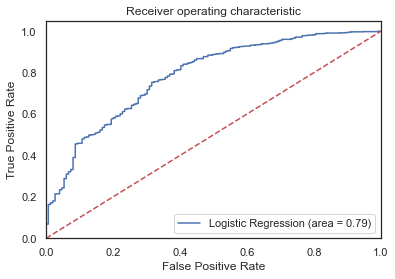

In [37]:
plot_roc_auc(glm_logit_results)

In [38]:
pseudo_r2(glm_logit_results)

Pseudo R2: 0.1733075070278497


In [39]:
adj_count_r2(glm_logit_results)

Adj Count R2: 0.081


# Probit

In [40]:
glm_probit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.probit))
glm_probit_results = glm_probit.fit()
glm_probit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1147
Model Family:                      Binomial   Df Model:                           21
Link Function:                       probit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -369.83
Date:                      Thu, 13 May 2021   Deviance:                       739.67
Time:                              20:56:14   Pearson chi2:                 1.19e+03
No. Iterations:                           7                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                             0.0328      0.235      0.140      0.889      -0.427       0.492
Woman                                                             0.2232      0.111      2.018      0.044       0.006       0.440
Car                                                              -0.2108      0.113     -1.859      0.063      -0.433       0.011
District_CIUTAT VELLA                                            -0.6673      0.235     -2.843      0.004      -1.127      -0.207
District_GRÀCIA                                                  -0.4530      0.215     -2.108      0.035      -0.874      -0.032
District_HORTA - GUINARDÓ                                        -0.1039      0.206     -0.505      0.614      -0.507       0.299
District_LES CORTS                                               -0.1178      0.229     -0.515      0.607      -0.566       0.331
District_NOU BARRIS                                              -0.2548      0.211     -1.205      0.228      -0.669       0.159
District_SANT ANDREU                                             -0.1394      0.226     -0.616      0.538      -0.583       0.304
District_SANT MARTÍ                                              -0.1314      0.206     -0.638      0.523      -0.535       0.272
District_SANTS - MONTJUÏC                                        -0.3259      0.215     -1.514      0.130      -0.748       0.096
District_SARRIÀ - SANT GERVASI                                   -0.1514      0.231     -0.657      0.511      -0.603       0.300
BCN_evolution_IT HAS IMPROVED                                     0.3678      0.161      2.282      0.022       0.052       0.684
BCN_evolution_IT IS THE SAME                                      0.2855      0.145      1.975      0.048       0.002       0.569
BCN_future_IT WILL IMPROVE                                        0.6284      0.126      4.971      0.000       0.381       0.876
BCN_future_IT WILL STAY THE SAME                                  0.2973      0.136      2.191      0.028       0.031       0.563
ASPHALT AND STREET CONSERVATION_GOOD                              0.4082      0.168      2.432      0.015       0.079       0.737
ASPHALT AND STREET CONSERVATION_NEITHER BAD, NOR GOOD             0.1094      0.147      0.744      0.457      -0.179       0.398
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD                      0.3205      0.162      1.981      0.048       0.003       0.638
CITIZEN SECURITY IN THE CITY AS A WHOLE_NEITHER BAD, NOR GOOD     0.4010      0.128      3.141      0.002       0.151       0.651
CITY MANAGEMENT_GOOD       

In [41]:
glm_probit_results.aic

783.6653983833979

In [42]:
glm_probit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7362.632445425064

In [43]:
odds_ratios(glm_probit_results)

const                                                            1.033331
Woman                                                            1.250084
Car                                                              0.809954
District_CIUTAT VELLA                                            0.513104
District_GRÀCIA                                                  0.635721
District_HORTA - GUINARDÓ                                        0.901327
District_LES CORTS                                               0.888915
District_NOU BARRIS                                              0.775083
District_SANT ANDREU                                             0.869881
District_SANT MARTÍ                                              0.876843
District_SANTS - MONTJUÏC                                        0.721888
District_SARRIÀ - SANT GERVASI                                   0.859472
BCN_evolution_IT HAS IMPROVED                                    1.444488
BCN_evolution_IT IS THE SAME          

In [44]:
classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0,17,132
1,5,1015


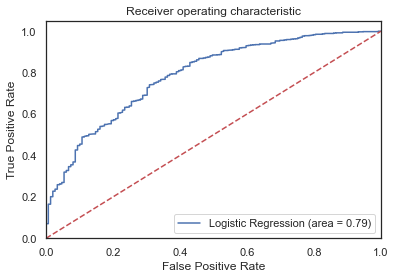

In [45]:
plot_roc_auc(glm_probit_results)

In [46]:
pseudo_r2(glm_probit_results)

Pseudo R2: 0.17079109668181236


In [47]:
adj_count_r2(glm_probit_results)

Adj Count R2: 0.081


# Scobit

In [48]:
glm_scobit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.cloglog))
glm_scobit_results = glm_scobit.fit()
glm_scobit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1147
Model Family:                      Binomial   Df Model:                           21
Link Function:                      cloglog   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -371.55
Date:                      Thu, 13 May 2021   Deviance:                       743.10
Time:                              20:56:15   Pearson chi2:                 1.16e+03
No. Iterations:                           9                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -0.2111      0.205     -1.029      0.304      -0.613       0.191
Woman                                                             0.1712      0.090      1.912      0.056      -0.004       0.347
Car                                                              -0.1744      0.090     -1.934      0.053      -0.351       0.002
District_CIUTAT VELLA                                            -0.5552      0.196     -2.834      0.005      -0.939      -0.171
District_GRÀCIA                                                  -0.3943      0.176     -2.246      0.025      -0.738      -0.050
District_HORTA - GUINARDÓ                                        -0.1226      0.164     -0.746      0.456      -0.445       0.200
District_LES CORTS                                               -0.0682      0.182     -0.375      0.708      -0.424       0.288
District_NOU BARRIS                                              -0.1968      0.170     -1.156      0.248      -0.531       0.137
District_SANT ANDREU                                             -0.1472      0.179     -0.821      0.412      -0.499       0.204
District_SANT MARTÍ                                              -0.1597      0.160     -0.996      0.319      -0.474       0.155
District_SANTS - MONTJUÏC                                        -0.2626      0.174     -1.505      0.132      -0.605       0.079
District_SARRIÀ - SANT GERVASI                                   -0.1407      0.182     -0.775      0.439      -0.497       0.215
BCN_evolution_IT HAS IMPROVED                                     0.2926      0.119      2.459      0.014       0.059       0.526
BCN_evolution_IT IS THE SAME                                      0.2314      0.112      2.071      0.038       0.012       0.450
BCN_future_IT WILL IMPROVE                                        0.4854      0.105      4.603      0.000       0.279       0.692
BCN_future_IT WILL STAY THE SAME                                  0.2314      0.116      1.986      0.047       0.003       0.460
ASPHALT AND STREET CONSERVATION_GOOD                              0.3172      0.142      2.235      0.025       0.039       0.595
ASPHALT AND STREET CONSERVATION_NEITHER BAD, NOR GOOD             0.1035      0.131      0.792      0.428      -0.153       0.360
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD                      0.3037      0.133      2.288      0.022       0.044       0.564
CITIZEN SECURITY IN THE CITY AS A WHOLE_NEITHER BAD, NOR GOOD     0.3346      0.110      3.041      0.002       0.119       0.550
CITY MANAGEMENT_GOOD       

In [49]:
glm_scobit_results.aic

787.0977985559406

In [50]:
glm_scobit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7359.200045252522

In [51]:
odds_ratios(glm_scobit_results)

const                                                            0.809679
Woman                                                            1.186708
Car                                                              0.839993
District_CIUTAT VELLA                                            0.573951
District_GRÀCIA                                                  0.674185
District_HORTA - GUINARDÓ                                        0.884579
District_LES CORTS                                               0.934105
District_NOU BARRIS                                              0.821352
District_SANT ANDREU                                             0.863104
District_SANT MARTÍ                                              0.852362
District_SANTS - MONTJUÏC                                        0.769019
District_SARRIÀ - SANT GERVASI                                   0.868729
BCN_evolution_IT HAS IMPROVED                                    1.339911
BCN_evolution_IT IS THE SAME          

In [52]:
classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0,5,144
1,4,1016


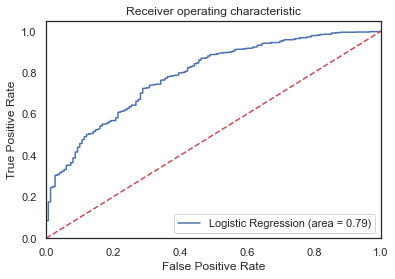

In [53]:
plot_roc_auc(glm_scobit_results)

In [54]:
pseudo_r2(glm_scobit_results)

Pseudo R2: 0.16694317194578423


In [55]:
adj_count_r2(glm_scobit_results)

Adj Count R2: 0.007


# Results comparison

In [56]:
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1147
Model Family:                      Binomial   Df Model:                           21
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -368.71
Date:                      Thu, 13 May 2021   Deviance:                       737.42
Time:                              20:56:16   Pearson chi2:                 1.21e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -0.0595      0.421     -0.142      0.887      -0.884       0.765
Woman                                                             0.4311      0.205      2.101      0.036       0.029       0.833
Car                                                              -0.3777      0.213     -1.772      0.076      -0.795       0.040
District_CIUTAT VELLA                                            -1.2070      0.428     -2.820      0.005      -2.046      -0.368
District_GRÀCIA                                                  -0.7994      0.396     -2.016      0.044      -1.576      -0.022
District_HORTA - GUINARDÓ                                        -0.1395      0.384     -0.363      0.716      -0.892       0.613
District_LES CORTS                                               -0.2628      0.426     -0.617      0.537      -1.098       0.572
District_NOU BARRIS                                              -0.4926      0.391     -1.261      0.207      -1.258       0.273
District_SANT ANDREU                                             -0.1936      0.427     -0.453      0.651      -1.031       0.644
District_SANT MARTÍ                                              -0.1450      0.395     -0.367      0.713      -0.919       0.629
District_SANTS - MONTJUÏC                                        -0.6081      0.397     -1.533      0.125      -1.386       0.169
District_SARRIÀ - SANT GERVASI                                   -0.2520      0.434     -0.580      0.562      -1.103       0.599
BCN_evolution_IT HAS IMPROVED                                     0.7058      0.327      2.155      0.031       0.064       1.348
BCN_evolution_IT IS THE SAME                                      0.5330      0.279      1.913      0.056      -0.013       1.079
BCN_future_IT WILL IMPROVE                                        1.2037      0.235      5.126      0.000       0.743       1.664
BCN_future_IT WILL STAY THE SAME                                  0.5504      0.243      2.270      0.023       0.075       1.026
ASPHALT AND STREET CONSERVATION_GOOD                              0.7952      0.308      2.585      0.010       0.192       1.398
ASPHALT AND STREET CONSERVATION_NEITHER BAD, NOR GOOD             0.1819      0.258      0.706      0.480      -0.323       0.687
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD                      0.4989      0.299      1.670      0.095      -0.087       1.084
CITIZEN SECURITY IN THE CITY AS A WHOLE_NEITHER BAD, NOR GOOD     0.7260      0.229      3.170      0.002       0.277       1.175
CITY MANAGEMENT_GOOD       

In [57]:
glm_probit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1147
Model Family:                      Binomial   Df Model:                           21
Link Function:                       probit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -369.83
Date:                      Thu, 13 May 2021   Deviance:                       739.67
Time:                              20:56:16   Pearson chi2:                 1.19e+03
No. Iterations:                           7                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                             0.0328      0.235      0.140      0.889      -0.427       0.492
Woman                                                             0.2232      0.111      2.018      0.044       0.006       0.440
Car                                                              -0.2108      0.113     -1.859      0.063      -0.433       0.011
District_CIUTAT VELLA                                            -0.6673      0.235     -2.843      0.004      -1.127      -0.207
District_GRÀCIA                                                  -0.4530      0.215     -2.108      0.035      -0.874      -0.032
District_HORTA - GUINARDÓ                                        -0.1039      0.206     -0.505      0.614      -0.507       0.299
District_LES CORTS                                               -0.1178      0.229     -0.515      0.607      -0.566       0.331
District_NOU BARRIS                                              -0.2548      0.211     -1.205      0.228      -0.669       0.159
District_SANT ANDREU                                             -0.1394      0.226     -0.616      0.538      -0.583       0.304
District_SANT MARTÍ                                              -0.1314      0.206     -0.638      0.523      -0.535       0.272
District_SANTS - MONTJUÏC                                        -0.3259      0.215     -1.514      0.130      -0.748       0.096
District_SARRIÀ - SANT GERVASI                                   -0.1514      0.231     -0.657      0.511      -0.603       0.300
BCN_evolution_IT HAS IMPROVED                                     0.3678      0.161      2.282      0.022       0.052       0.684
BCN_evolution_IT IS THE SAME                                      0.2855      0.145      1.975      0.048       0.002       0.569
BCN_future_IT WILL IMPROVE                                        0.6284      0.126      4.971      0.000       0.381       0.876
BCN_future_IT WILL STAY THE SAME                                  0.2973      0.136      2.191      0.028       0.031       0.563
ASPHALT AND STREET CONSERVATION_GOOD                              0.4082      0.168      2.432      0.015       0.079       0.737
ASPHALT AND STREET CONSERVATION_NEITHER BAD, NOR GOOD             0.1094      0.147      0.744      0.457      -0.179       0.398
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD                      0.3205      0.162      1.981      0.048       0.003       0.638
CITIZEN SECURITY IN THE CITY AS A WHOLE_NEITHER BAD, NOR GOOD     0.4010      0.128      3.141      0.002       0.151       0.651
CITY MANAGEMENT_GOOD       

In [58]:
glm_scobit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1147
Model Family:                      Binomial   Df Model:                           21
Link Function:                      cloglog   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -371.55
Date:                      Thu, 13 May 2021   Deviance:                       743.10
Time:                              20:56:17   Pearson chi2:                 1.16e+03
No. Iterations:                           9                                         
Covariance Type:                  nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -0.2111      0.205     -1.029      0.304      -0.613       0.191
Woman                                                             0.1712      0.090      1.912      0.056      -0.004       0.347
Car                                                              -0.1744      0.090     -1.934      0.053      -0.351       0.002
District_CIUTAT VELLA                                            -0.5552      0.196     -2.834      0.005      -0.939      -0.171
District_GRÀCIA                                                  -0.3943      0.176     -2.246      0.025      -0.738      -0.050
District_HORTA - GUINARDÓ                                        -0.1226      0.164     -0.746      0.456      -0.445       0.200
District_LES CORTS                                               -0.0682      0.182     -0.375      0.708      -0.424       0.288
District_NOU BARRIS                                              -0.1968      0.170     -1.156      0.248      -0.531       0.137
District_SANT ANDREU                                             -0.1472      0.179     -0.821      0.412      -0.499       0.204
District_SANT MARTÍ                                              -0.1597      0.160     -0.996      0.319      -0.474       0.155
District_SANTS - MONTJUÏC                                        -0.2626      0.174     -1.505      0.132      -0.605       0.079
District_SARRIÀ - SANT GERVASI                                   -0.1407      0.182     -0.775      0.439      -0.497       0.215
BCN_evolution_IT HAS IMPROVED                                     0.2926      0.119      2.459      0.014       0.059       0.526
BCN_evolution_IT IS THE SAME                                      0.2314      0.112      2.071      0.038       0.012       0.450
BCN_future_IT WILL IMPROVE                                        0.4854      0.105      4.603      0.000       0.279       0.692
BCN_future_IT WILL STAY THE SAME                                  0.2314      0.116      1.986      0.047       0.003       0.460
ASPHALT AND STREET CONSERVATION_GOOD                              0.3172      0.142      2.235      0.025       0.039       0.595
ASPHALT AND STREET CONSERVATION_NEITHER BAD, NOR GOOD             0.1035      0.131      0.792      0.428      -0.153       0.360
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD                      0.3037      0.133      2.288      0.022       0.044       0.564
CITIZEN SECURITY IN THE CITY AS A WHOLE_NEITHER BAD, NOR GOOD     0.3346      0.110      3.041      0.002       0.119       0.550
CITY MANAGEMENT_GOOD       

In [59]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0,21,128
1,9,1011


In [60]:
classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0,17,132
1,5,1015


In [61]:
classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0,5,144
1,4,1016


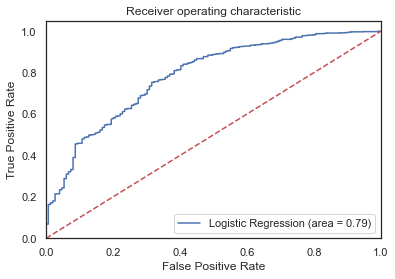

In [62]:
plot_roc_auc(glm_logit_results)

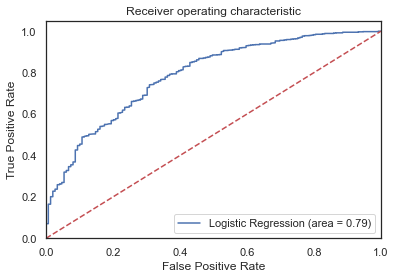

In [63]:
plot_roc_auc(glm_probit_results)

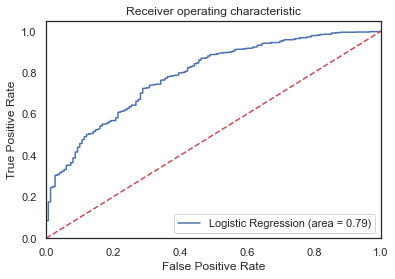

In [64]:
plot_roc_auc(glm_scobit_results)

In [65]:
print("Logit")
pseudo_r2(glm_logit_results)
adj_count_r2(glm_logit_results)

Logit
Pseudo R2: 0.1733075070278497
Adj Count R2: 0.081


In [66]:
print("Probit")
pseudo_r2(glm_probit_results)
adj_count_r2(glm_probit_results)

Probit
Pseudo R2: 0.17079109668181236
Adj Count R2: 0.081


In [67]:
print("Scobit")
pseudo_r2(glm_scobit_results)
adj_count_r2(glm_scobit_results)

Scobit
Pseudo R2: 0.16694317194578423
Adj Count R2: 0.007


In [68]:
print("Logit \n AIC:", glm_logit_results.aic, "BIC:", glm_logit_results.bic)

Logit 
 AIC: 781.4207268010628 BIC: -7364.8771170074


C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


In [69]:
print("Probit \n AIC:", glm_probit_results.aic, "BIC:", glm_probit_results.bic)

Probit 
 AIC: 783.6653983833979 BIC: -7362.632445425064


In [70]:
print("Scobit \n AIC:", glm_scobit_results.aic, "BIC:", glm_scobit_results.bic)

Scobit 
 AIC: 787.0977985559406 BIC: -7359.200045252522
